In [1]:
# By: Biswajit Ghoshal - Analytics Vidhya: Game of DL - CV for ship categories - 09-Jun-2019
from os import listdir
from os.path import isfile, join
import cv2, glob, statistics, keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.model_selection import train_test_split

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mypath = "D:/Biswajit/HackerearthML/AnalyticsVidhya/images/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
onlyfiles[1:5]

['1001804.jpg', '1003035.jpg', '1004028.jpg', '1004054.jpg']

In [4]:
for i in onlyfiles[10:15] :
    fname = mypath + i
    imdata = cv2.imread(fname)
    print(imdata.shape)

(52, 210, 3)
(157, 210, 3)
(158, 210, 3)
(158, 210, 3)
(78, 210, 3)


In [5]:
mypath = "D:/Biswajit/HackerearthML/AnalyticsVidhya/images/*.jpg"
# images = [cv2.imread(file) for file in glob.glob(mypath)] one way to load the files

In [6]:
# another way to load the files - which we are going to use
data = []
for f1 in glob.glob(mypath):
    img = cv2.imread(f1)
#    img_res = img.resize((140,210,3))
    data.append(img)

In [7]:
len(data)

8932

In [8]:
cv2.imread?

In [8]:
l = []
for i in range(len(data)) :
    l.append(data[i].shape[1])

In [9]:
from collections import Counter
Counter(l)

Counter({91: 1,
         96: 1,
         97: 1,
         98: 1,
         100: 1,
         101: 1,
         105: 22,
         106: 2,
         107: 1,
         108: 1,
         109: 2,
         111: 1,
         112: 1,
         113: 1,
         115: 3,
         116: 1,
         119: 13,
         120: 2,
         121: 2,
         122: 1,
         124: 1,
         126: 2,
         128: 1,
         130: 1,
         133: 1,
         134: 1,
         135: 1,
         136: 1,
         137: 1,
         138: 1,
         142: 1,
         143: 1,
         144: 2,
         146: 2,
         151: 1,
         156: 4,
         158: 2,
         160: 1,
         161: 3,
         162: 1,
         166: 2,
         167: 1,
         169: 1,
         172: 3,
         173: 3,
         174: 1,
         175: 1,
         176: 1,
         179: 3,
         180: 2,
         181: 2,
         182: 1,
         183: 2,
         184: 3,
         185: 1,
         186: 1,
         187: 3,
         188: 1,
         189: 1,

In [11]:
# ndata = np.stack(data)

In [10]:
data[1].shape

(134, 210, 3)

In [11]:
cv2.namedWindow('Lena')  # Images can be displayed using built in opencv functions. In particular it is possible 
cv2.imshow('Lena', cv2.resize(data[4000], (150, 120), interpolation = cv2.INTER_AREA)) # to create "named windows" (i.e., windows with a title) and show images
cv2.waitKey()   # cv2.resize(data[6001], (210, 160), interpolation = cv2.INTER_AREA)
cv2.destroyAllWindows()

In [12]:
trn_img = pd.read_csv("D:/Biswajit/HackerearthML/AnalyticsVidhya/train.csv")
tst_img = pd.read_csv("D:/Biswajit/HackerearthML/AnalyticsVidhya/test_ApKoW4T.csv")

In [13]:
print(trn_img["image"].head())
print(tst_img["image"].tail())
mypath = "D:/Biswajit/HackerearthML/AnalyticsVidhya/images/"

0    2823080.jpg
1    2870024.jpg
2    2662125.jpg
3    2900420.jpg
4    2804883.jpg
Name: image, dtype: object
2675    950995.jpg
2676    951046.jpg
2677    951323.jpg
2678    952113.jpg
2679    953982.jpg
Name: image, dtype: object


In [14]:
# read training files with resize information
datr = []
for f1 in trn_img["image"]:
    img = cv2.imread(mypath + f1)
    try:
        img_res = cv2.resize(img, (150, 120), interpolation = cv2.INTER_AREA)  # Later check (160,210) for better result
        datr.append(img_res)
    except Exception as e:
        print(f1)

In [15]:
cv2.namedWindow('Lena')  # Images can be displayed using built in opencv functions. In particular it is possible 
cv2.imshow('Lena', datr[6251]) # cv2.resize(datr[6251]), (210, 160), interpolation = cv2.INTER_AREA) # to create "named windows" (i.e., windows with a title) and show images
cv2.waitKey()   # cv2.resize(data[6001], (210, 160), interpolation = cv2.INTER_AREA)
cv2.destroyAllWindows()
print(trn_img["category"][6251])

1


In [16]:
# read test data with resize information
dats = []
for f1 in tst_img["image"]:
    img = cv2.imread(mypath + f1)
    try:
        img_res = cv2.resize(img, (150, 120), interpolation = cv2.INTER_AREA)  # Later check (160,210) for better result
        dats.append(img_res)
    except Exception as e:
        print(f1)

In [17]:
datr1 = np.array(datr)
dats1 = np.array(dats)
print("datr1 shape: ", datr1.shape)
print("dats1 shape: ", dats1.shape)

datr1 shape:  (6252, 120, 150, 3)
dats1 shape:  (2680, 120, 150, 3)


In [18]:
data_train, data_val, labels_train, labels_val = train_test_split(datr1, 
                                                                    trn_img["category"], test_size=0.10, random_state=42)

In [19]:
print("data_train shape: ", data_train.shape)
print("data_val shape: ", data_val.shape)
print("labels_train shape: ", labels_train.shape)
print("labels_val shape: ", labels_val.shape)
classes = np.unique(labels_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

data_train shape:  (5626, 120, 150, 3)
data_val shape:  (626, 120, 150, 3)
labels_train shape:  (5626,)
labels_val shape:  (626,)
Total number of outputs :  5
Output classes :  [1 2 3 4 5]


In [20]:
nRows,nCols,nDims = data_train.shape[1:]
train_data = data_train.reshape(data_train.shape[0], nRows, nCols, nDims)
test_data = data_val.reshape(data_val.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(labels_train - 1)  # Remember to add 1 to the predicted label
test_labels_one_hot = to_categorical(labels_val - 1)

In [21]:
print('Original label 0 : ', labels_val[1703]) # this is the 1st record, which gets 0 index in 1hot-set
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[0])
print("input_shape:", input_shape)

Original label 0 :  4
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0.]
input_shape: (120, 150, 3)


In [25]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding= 'same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Conv2D(64, (3, 3), padding= 'same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
  
    return model

In [26]:
model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 120, 150, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 118, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 59, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 59, 74, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 57, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 36, 64)        0         
__________

In [27]:
batch_size = 128
epochs = 30
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Train on 5626 samples, validate on 626 samples
Epoch 1/30
5626/5626 [==============================] - 968s 172ms/step - loss: 1.6731 - acc: 0.3269 - val_loss: 1.5253 - val_acc: 0.3211
Epoch 2/30
5626/5626 [==============================] - 908s 161ms/step - loss: 1.4961 - acc: 0.3518 - val_loss: 1.3543 - val_acc: 0.3962
Epoch 3/30
5626/5626 [==============================] - 902s 160ms/step - loss: 1.3070 - acc: 0.4406 - val_loss: 1.6961 - val_acc: 0.3115
Epoch 4/30
5626/5626 [==============================] - 901s 160ms/step - loss: 1.1944 - acc: 0.4968 - val_loss: 1.0968 - val_acc: 0.5591
Epoch 5/30
5626/5626 [==============================] - 901s 160ms/step - loss: 1.1045 - acc: 0.5551 - val_loss: 1.0290 - val_acc: 0.5815
Epoch 6/30
5626/5626 [==============================] - 904s 161ms/step - loss: 0.9894 - acc: 0.6079 - val_loss: 0.9935 - val_acc: 0.5990
Epoch 7/30
5626/5626 [==============================] - 904s 161ms/step - loss: 0.9147 - acc: 0.6342 - val_loss: 1.2138 - val

[1.8182265202458294, 0.7507987222351586]

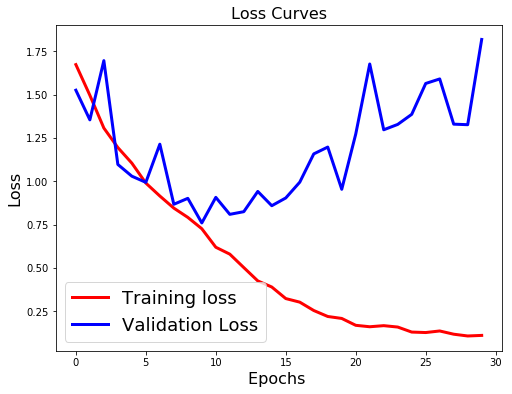

In [28]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

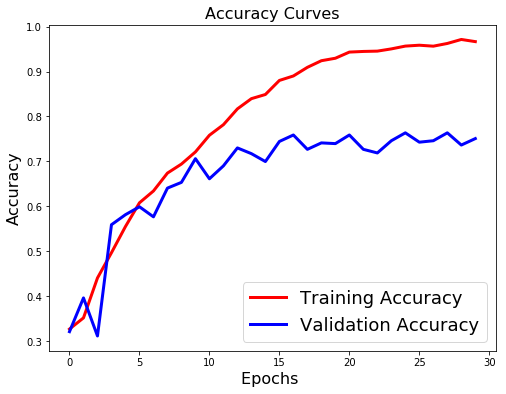

In [29]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [30]:
to_pred = dats1.astype('float32')
to_pred /= 255
p = model1.predict_classes(to_pred)
p += 1

In [31]:
Counter(p)

Counter({1: 1011, 2: 535, 3: 392, 4: 305, 5: 437})

In [32]:
tst_img[0:5]

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [33]:
df = pd.DataFrame({'image' : tst_img['image'], 'category' : p})
columnsTitles=["image","category"]
df=df.reindex(columns=columnsTitles)

In [34]:
df.head()

,image,category
0,1007700.jpg,4
1,1011369.jpg,4
2,1051155.jpg,4
3,1062001.jpg,2
4,1069397.jpg,4


In [35]:
df.to_csv("D:/Biswajit/HackerearthML/AnalyticsVidhya/BG_submit4.csv", index=0)